<h1>A3: Timed Unsupervised Learning Project</h1>
<h3>Feature engineer</h3>
<br>
<b>
    MBAN: Hult International Business School<br>
    DAT-5303 | Machine Learning</b><br>
<b>Team 6:</b>

* Fangxiao Wu
* Isaac Liu
* J. Eduardo Aguilar
* Punyisa Kraisang
* Skander Driss
* Tuba Ali

<br>
<br>
Countless consumers have pondered whether to buy Windows or Mac when preparing to buy a new computer. As a result, Apple (AAPL) and our company - Microsoft (MSFT) - have been rigorously researching several aspects of consumer buying behavior in regards to the decision making behind this question. 

Recently, the company has decided to approach this question from the perspective of the <a href='https://www.123test.com/big-five-personality-theory/'>Big Five personality traits</a> as well as the <a href='https://www.hult.edu/blog/why-every-leader-needs-growth-mindset/'>Hult DNA</a>. As such, we conducted a <a href='https://docs.google.com/forms/d/e/1FAIpQLSfCKEKUKXPYErVtQI-NWnh4XlKcrxzuW5iXbtUoQtAADbHw3Q/viewform'><i>survey</i></a> and ran an analysis on these factors. <br>

The file contains:

* Exploratory data analysis
* Feature treatment and engineering
* Utilizing unsupervised clustering model

***

<h2>Step 0: Libraries & Environment Setup</h2>

In [38]:
# Import libraries
import matplotlib.pyplot as plt          # For essential graphical output
import numpy as np                       # For array-processing
import pandas as pd                      # For data science essentials
import seaborn as sns                    # For enhanced graphical output

from sklearn.model_selection import train_test_split    # For train/test split
from sklearn.preprocessing   import StandardScaler      # For scaling
from sklearn.decomposition   import PCA                 # For pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

In [2]:
# Set file path
file_path = 'Survey_Data_Final_Exam.xlsx'

# Set pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
%%html
<!-- Set table style -->
<style>
    table.question_list {
        float:left;
        width: 90%
    }
    
    table.question_list tr{
        border: None;
        text-align: left;
        background-color: white;
    }
    
    table.question_list th{
        border: None;
        text-align: left;
        background-color: white;
    }
    
    table.question_list td{
        border: None;
        text-align: left;
        background-color: white;
    }
</style>

<h3>Functions</h3>

<h2>Step I: Import & Fundamental Dataset Exploration</h2>
<h3>Import dataset</h3>

In [4]:
# Get dataset
original_surveys = pd.read_excel(file_path)

# Copy dataset and work on it instead to prevent editing original dataset 
surveys = original_surveys.copy()

<h3>Explore dataset</h3>

In [5]:
# Investigate column names
#print(f'Column Names: \n{surveys.columns}\n\n')

# Get example of dataset
print('Example of survey:')
surveys.head(5)

Example of survey:


,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,a1000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,a1001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,a1002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian
3,a1003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,a1004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian


From example of the dataset, we can see that:

* Each row represents each survey respondents, while columns represent each question in the survey. 
* We can divide the survey questions into 3 sections
    * Big Five personality traits
    * Hult DNA 
    * Demographic information of respondents, containing personal information and their computer's preference
<br><br>

The following are the survey questions based on sections:

**Big Five**
<table class='question_list'>
    <tr><td>1. Am the life of the party</td>       <td>27. Have a soft heart</td></tr>
    <tr><td>2. Feel little concern for others</td> <td>28. Often forget to put things back in their proper place</td></tr>
    <tr><td>3. Am always prepared</td>             <td>29. Get upset easily</td></tr>
    <tr><td>4. Get stressed out easily</td>        <td>30. Do not have a good imagination</td></tr>
    <tr><td>5. Have a rich vocabulary</td>         <td>31. Talk to a lot of different people at parties</td></tr>
    <tr><td>6. Don't talk a lot</td>               <td>32. Am not really interested in others</td></tr>
    <tr><td>7. Am interested in people</td>        <td>33. Like order</td></tr>
    <tr><td>8. Leave my belongings around</td>     <td>34. Change my mood a lot</td></tr>
    <tr><td>9. Am relaxed most of the time</td>    <td>35. Am quick to understand things</td></tr>
    <tr><td>10. Have difficulty understanding abstract ideas</td><td>36. Don't like to draw attention to myself</td></tr>
    <tr><td>11. Feel comfortable around people</td><td>37. Take time out for others</td></tr>
    <tr><td>12. Insult people</td>                 <td>38. Shirk my duties</td></tr>
    <tr><td>13. Pay attention to details</td>      <td>39. Have frequent mood swings</td></tr>
    <tr><td>14. Worry about things</td>            <td>40. Use difficult words</td></tr>
    <tr><td>15. Have a vivid imagination</td>      <td>41. Don't mind being the center of attention</td></tr>
    <tr><td>16. Keep in the background</td>        <td>42. Feel others' emotions</td></tr>
    <tr><td>17. Sympathize with others' feelings</td><td>43. Follow a schedule</td></tr>
    <tr><td>18. Make a mess of things</td>         <td>44. Get irritated easily</td></tr>
    <tr><td>19. Seldom feel blue</td>              <td>45. Spend time reflecting on things</td></tr>
    <tr><td>20. Am not interested in abstract ideas</td><td>46. Am quiet around strangers</td></tr>
    <tr><td>21. Start conversations</td>           <td>47. Make people feel at ease</td></tr>
    <tr><td>22. Am not interested in other people's problems</td><td>48. Am exacting in my work</td></tr>
    <tr><td>23. Get chores done right away</td>    <td>49. Often feel blue</td></tr>
    <tr><td>24. Am easily disturbed</td>           <td>50. Am full of ideas</td></tr>
    <tr><td>25. Have excellent ideas</td>          <td>51. See underlying patterns in complex situations</td></tr>
    <tr><td>26. Have little to say</td>            <td>52. Don't  generate ideas that are new and different</td></tr>
</table>

**Hult DNA**
<table class='question_list'>
    <tr><td>53. Demonstrate an awareness of personal strengths and limitations</td></tr>
    <tr><td>54. Display a growth mindset</td></tr>
    <tr><td>55. Respond effectively to multiple priorities</td></tr>
    <tr><td>56. Take initiative even when circumstances, objectives, or rules aren't clear</td></tr>
    <tr><td>57. Encourage direct and open discussions</td></tr>
    <tr><td>58. Respond effectively to multiple priorities</td></tr>
    <tr><td>59. Take initiative even when circumstances, objectives, or rules aren't clear</td></tr>
    <tr><td>60. Encourage direct and open discussions</td></tr>
    <tr><td>61. Listen carefully to others</td></tr>
    <tr><td>62. Don't persuasively sell a vision or idea</td></tr>
    <tr><td>63. Build cooperative relationships</td></tr>
    <tr><td>64. Work well with people from diverse cultural backgrounds</td></tr>
    <tr><td>65. Effectively negotiate interests, resources, and roles</td></tr>
    <tr><td>66. Can't rally people on the team around a common goal</td></tr>
    <tr><td>67. Translate ideas into plans that are organized and realistic</td></tr>
    <tr><td>68. Resolve conflicts constructively</td></tr>
    <tr><td>69. Seek and use feedback from teammates</td></tr>
    <tr><td>70. Coach teammates for performance and growth</td></tr>
    <tr><td>71. Drive for results</td></tr>
</table>

**Demographic**
<table class='question_list'>
    <tr><td>72. What laptop do you currently have?</td></tr>
    <tr><td>73. What laptop would you buy in next assuming if all laptops cost the same?</td></tr>
    <tr><td>74. What program are you in?</td></tr>
    <tr><td>75. What is your age?</td></tr>
    <tr><td>76. Gender</td></tr>
    <tr><td>77. What is your nationality? </td></tr>
    <tr><td>78. What is your ethnicity?</td></tr>
</table>

In [6]:
# Investigate data types of each variables
#surveys.info()

# Investigate descrptive information of each questions
surveys.describe().round(3)

,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What is your age?
count,392.000,392.00,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000
mean,2.939,2.76,3.569,2.906,3.311,2.898,3.832,2.434,3.304,2.406,3.648,1.735,4.087,3.589,3.982,3.112,4.112,2.319,2.890,2.128,3.378,2.449,3.288,2.758,3.860,2.602,3.773,2.316,2.487,2.112,2.913,2.268,3.819,2.773,3.906,3.217,3.673,2.324,2.497,2.704,3.013,3.936,3.689,2.582,3.921,3.426,3.883,3.768,2.480,3.793,3.918,2.360,4.003,4.143,3.952,3.855,4.031,4.023,3.890,4.010,4.038,2.806,4.120,4.263,3.944,2.508,3.913,3.941,4.059,3.763,4.276,27.339
std,1.118,1.31,0.891,1.226,0.952,1.142,0.990,1.355,1.093,1.097,0.995,0.963,0.830,1.127,0.934,1.008,0.860,1.081,1.042,1.016,1.009,1.069,1.027,1.117,0.749,1.046,1.062,1.187,1.164,1.091,1.125,1.018,0.999,1.132,0.910,1.165,0.930,1.016,1.205,1.048,1.202,0.972,1.034,1.153,0.950,1.101,0.791,0.884,1.068,0.879,0.821,1.051,0.779,0.774,0.806,0.906,0.809,0.724,0.879,0.793,0.813,1.031,0.759,0.682,0.768,1.101,0.788,0.725,0.802,0.877,0.747,5.340
min,1.000,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1

As we explore on each questions' descriptive information, we see that the questions are in 1-5 scale (i.e. likert scale)). The questions ask respondents' opinion on how they describe themselves based on the questions. Each scale will stand for:
    1. Very Inaccurate
    2. Moderately Inaccurate
    3. Neither Accurate Nor Inaccurate
    4. Moderately Accurate
    5. Very Accurate
    
We will assume that all respondents understand the questions correctly and interpret them in the same way. Because we cannot detect and control how they translate the question. For example, question 29. Get upset easily, some people might interpret 'upset' as feeling angry, while the others might interpret it as feeling uneasy and troubled. For question 2. Feel little concern for others, the word 'little' can be interpreted differently for individual.

In addition, some people tend to avoid answering questions in extreme behavior. They might not answer 'very inaccurate' or 'vary accurate'. Plus, the sense of choosing between 'moderately' and 'very' are different based on people. Let's see if we have these people in our dataset.

In [7]:
# Get descriptive information on each respondents' answers
q_desc = surveys.iloc[:, 1:72].T.describe().round(2).T

# Filter only respondent that did not answer 1 and 5
print('Respondents that did not answer 1 and 5:')
q_desc[((q_desc['min']!= 1) & (q_desc['max']!= 5))]

Respondents that did not answer 1 and 5:


,count,mean,std,min,25%,50%,75%,max
54,71.0,3.06,0.69,2.0,3.0,3.0,4.0,4.0
101,71.0,3.17,0.68,2.0,3.0,3.0,4.0,4.0
202,71.0,3.06,0.69,2.0,3.0,3.0,4.0,4.0
249,71.0,3.17,0.68,2.0,3.0,3.0,4.0,4.0
361,71.0,3.49,0.77,2.0,3.0,4.0,4.0,4.0


Only 5 respondents show this characteristic. We could consider flag these respondents as non-extreme surveyee. Nevertheless, the sample size is too small comparing to entire sample size, and it is also possible that the surveyees really observed themselves as non-extreme. Plus, we do not have a way to distinguish these two cases because of lag of information. 

Below shows a histogram of standard deviation of respondents. The distribution is almost bell-curved as the answers are almost normally distributed. As such, we decide to leave the non-extreme respondents here without flag.

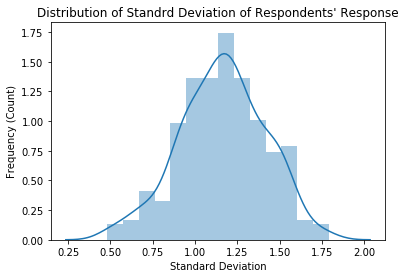

In [8]:
# Plot the histrogram of stardard deviation of each repondents' anwers
plt.figure()
sns.distplot(q_desc['std'],
             kde = True)
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency (Count)')
plt.title("Distribution of Standrd Deviation of Respondents' Response")

# Show the plot
plt.show()

In any case, based on the question lists, we notice that some questions might relate to each other. For example:
    6. Don't talk a lot
    26. Have little to say
and
    10. Have difficulty understanding abstract ideas
    15. Have a vivid imagination
    20. Am not interested in abstract ideas
    30. Do not have a good imagination

Some questions are opposite to each other. For example:
    19. Seldom feel blue
    49. Often feel blue

Some questions are duplicated. For example:
    55. Respond effectively to multiple priorities
    58. Respond effectively to multiple priorities
and
    56. Take initiative even when circumstances, objectives, or rules aren't clear
    59. Take initiative even when circumstances, objectives, or rules aren't clear
and
    57. Encourage direct and open discussions
    60. Encourage direct and open discussions

Some questions are negative sentences that we can reverse. For example:
    6. Don't talk a lot
    20. Am not interested in abstract ideas
    22. Am not interested in other people's problems
    30. Do not have a good imagination
    36. Don't like to draw attention to myself
    62. Don't persuasively sell a vision or idea
    66. Can't rally people on the team around a common goal

As observed, we gain overall idea on how we should handle these variations of data. We will talk about this in detail in next section but the rough idea is to try reverse the scale of the negative question in order to make all questions consistent, and discuss a solution for intended duplicated columns.

Earlier, we only discuss on Big Five and Hult DNA's questions. Let's we focus on Demographic responses.

In [9]:
# Get example of demographic question's answer
print('Example of Demographic response:')
surveys.iloc[:, 72:79].head(5)

Example of Demographic response:


,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian
3,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian


In [10]:
# Inspect current laptop
print(surveys.iloc[:, 72].value_counts(), '\n')

# Inspect future laptop
print(surveys.iloc[:, 73].value_counts())

Macbook           199
Windows laptop    192
MAC                 1
Name: What laptop do you currently have?, dtype: int64 

Macbook           218
Windows laptop    163
Chromebook         10
MAC                 1
Name: What laptop would you buy in next assuming if all laptops cost the same?, dtype: int64


From the value count, we see that there are two duplicate value of Mac laptop - Macbook and MAC. We might combine them since they are same answer. However, if we check the survey, we will find that there is no choice for 'MAC'. Later we might consider remove this respondent because it is likely a data error.

In [11]:
# Inspect degree program 
print(surveys.iloc[:, 74].value_counts())

DD (MIB & Business Analytics)       198
One year Business Analytics          99
DD (MBA & Business Analytics)        93
DD (MBA & Disruptive innovation)      2
Name: What program are you in?, dtype: int64


From the value count, we see that there are two respondents enrolling in dual degree program (MBA & Disruptive innovation). It will not be strange in normal case, but since the survey was conducted only in Business Analytics program, these two responses are considered as errors. Later, we might remove these respondents.

In [12]:
# Inspect age distribution
print(surveys.iloc[:, 75].describe().round(2))

count    392.00
mean      27.34
std        5.34
min       15.00
25%       24.00
50%       26.00
75%       29.00
max       51.00
Name: What is your age?, dtype: float64


From the age descriptive information, even though there is no age limit in taking master degree in USA, based on a <a href='https://www.cgsnet.org/ckfinder/userfiles/files/DataSources_2009_12.pdf'>research</a> of age group in graduate program, we could say that the normal age range is 21-40 years. Therefore, ages that are not in this range should be flagged as outliers and might be considered dropped.

In [13]:
# Inspect gender
#print(surveys.iloc[:, 76].value_counts(), '\n')

# Inspect nationality
print(surveys.iloc[:, 77].value_counts().head(10), '\n')

# Inspect ethnicity
print(surveys.iloc[:, 78].value_counts(), '\n')

# Show total number of missing value
null_columns = surveys.columns[surveys.isnull().any()]
print('Null Columns:')
print(surveys[null_columns].isnull().sum().sort_values(ascending=False))

Indian       51
China        28
German       17
Mexican      14
Peruvian     11
Taiwan        9
Chinese       9
Russian       8
Thai          7
Brazilian     7
Name: What is your nationality? , dtype: int64 

White / Caucasian       98
Far east Asian          85
West Asian / Indian     77
Hispanic / Latino       70
Prefer not to answer    31
African American        21
Middle Eastern           7
Native American          2
Name: What is your ethnicity?, dtype: int64 

Null Columns:
What is your ethnicity?    1
dtype: int64


Gender column has two possible responses which are male or female. There are no missing data.

Then, we jump to nationality and ethnicity questions. These 2 are quite complicated. Nationality question is a free input field as we see that they have some answers that can group together, such as China and Chinese, Indian and indian. Plus, one might consider answer nationality where he grew up not where he he was born. 

Similar to nationality, ethnicity has a problem whether the entered answers are reliable. Though the answer is a checkbox so we do not have a problem on data format, we notice that some ethnicity is missing. For example, people from Thailand would considered themselves be in South-East Asian but because there is no choice for South-East Asian, they might choose Far east Asian that is closest to their choice, or Prefer not to answer. Moreover, some people do not know what are their ethnicity. They might randomly choose what they want, whatever fits their parents, or prefer not to answer because they do not know what to do. 

<span class="mark">With all these complexities and irrelevantness with the nationality and ethnicity, we should consider drop these 2 columns.</span>

<h2>Step II: Data Cleaning</h2>

As we explored dataset in previous section, now it is time to clean the dirty data based on what we observed.

<h3>Negative survey questions</h3>

Negative question is not a bad thing. However, in order to make all questions consistent and easier to interpret later in the model, the negative question should be inverted. Here is a list of negative questions:
    6. Don't talk a lot
    20. Am not interested in abstract ideas
    22. Am not interested in other people's problems
    30. Do not have a good imagination
    32. Am not really interested in others
    36. Don't like to draw attention to myself
    41. Don't mind being the center of attention
    52. Don't generate ideas that are new and different
    62. Don't persuasively sell a vision or idea
    66. Can't rally people on the team around a common goal

In [14]:
# Set negative questions' index
neg_q_index = [6, 20, 22, 30, 32, 36, 41, 52, 62, 66]

# Invert questions
surveys.rename(
    columns = {
        "Don't talk a lot": "Talk a lot",
        "Am not interested in abstract ideas": "Am interested in abstract ideas", 
        "Am not interested in other people's problems": "Am interested in other people's problems", 
        "Do not have a good imagination": "Have a good imagination", 
        "Am not really interested in others": "Am really interested in others", 
        "Don't like to draw attention to myself": "Like to draw attention to myself", 
        "Don't mind being the center of attention": "Mind being the center of attention", 
        "Don't  generate ideas that are new and different": "Generate ideas that are new and different", 
        "Don't persuasively sell a vision or idea": "Persuasively sell a vision or idea", 
        "Can't rally people on the team around a common goal": "Can rally people on the team around a common goal"}, 
    inplace = True)

# Reverse reponse
surveys.iloc[:, neg_q_index] = 6-surveys.iloc[:, neg_q_index]

# Check if the negative questions are inverted
#surveys.iloc[:, neg_q_index].head(5)

<h3>Duplicated survey questions</h3>

The duplications are intended for checking whether the respondents throughly read and took the survey seriously or not. Since we have 3 pair of duplicated questions, we should check all the pairs. Here are the duplicated questions:

<table class='question_list'>
    <tr>
        <th>1st Set</th>
        <th>2nd Set</th>
    </tr>
    <tr>
        <td>55. Respond effectively to multiple priorities</td>
        <td>58. Respond effectively to multiple priorities</td>
    </tr>
    <tr>
        <td>56. Take initiative even when circumstances, objectives, or rules aren't clear</td>
        <td>59. Take initiative even when circumstances, objectives, or rules aren't clear</td>
    </tr>
    <tr>
        <td>57. Encourage direct and open discussions</td>
        <td>60. Encourage direct and open discussions</td>
    </tr>
</table>


We will check if each pair are similar to each other. Similar means having the difference in responses less than or equal to 1 (absolute value). We want to flexible the criteria in case that the surveyee read the questions but did not notice the duplications.

In [15]:
# Determine if 1st pair is not similar
diff_multi_pri = ( abs(surveys.iloc[:, 55] - surveys.iloc[:, 58]) > 1 )*1

# Determine if 2st pair is not similar
diff_initiative = ( abs(surveys.iloc[:, 56] - surveys.iloc[:, 59]) > 1 )*1

# Determine if 3st pair is not similar
diff_enc_open = ( abs(surveys.iloc[:, 57] - surveys.iloc[:, 60]) > 1 )*1

# Get only the respondents that more than half of pairs is different
diff_dup_index = surveys[diff_multi_pri + diff_initiative + diff_enc_open >= 2].index.values
#surveys.iloc[diff_dup_index, [55, 58, 56, 59, 57, 60]]

<span class="mark">Add markdown on averaging</span>

In [16]:
# Calculate average of 1st pair of duplicated columns
surveys['avg_multitask'] = (surveys.iloc[:, 55] + surveys.iloc[:, 58])/2

# Calculate average of 1st pair of duplicated columns
surveys['avg_initiative'] = (surveys.iloc[:, 56] + surveys.iloc[:, 59])/2

# Calculate average of 1st pair of duplicated columns
surveys['avg_open_discussion'] = (surveys.iloc[:, 57] + surveys.iloc[:, 60])/2

# Check if the duplicated reponses are averaged
#surveys.head(5)

<h3>Impossible responses</h3>

According to **Explore dataset** section, we found that there are 'MAC' response in questions 72. What laptop do you currently have? and 73. What laptop would you buy in next?. It is likely a data error because there is no way the surveyee could enter 'MAC' through the survey. Same as the respondents enrolling in dual degree program (MBA & Disruptive innovation), the survey was conducted only in Business Analytics program. So, the responses are also considered as errors. In addition, it is unlikely to have a 15 years old as graduate student in business school.

We will drop all these errors.

In [17]:
# Determine the respondents that answer MAC in current laptop question
cur_mac_index = surveys[surveys.iloc[:, 72] == 'MAC'].index.values

# Determine the respondents that answer MAC in future laptop question
fut_mac_index = surveys[surveys.iloc[:, 73] == 'MAC'].index.values

# Determine the respondents that answer disruptive program 
prog_index = surveys[surveys.iloc[:, 74] == 'DD (MBA & Disruptive innovation)'].index.values

# Determine the respondents that age lower than 21 
age_lo_index = surveys[surveys.iloc[:, 75] < 21].index.values

In [18]:
# Combine all error data indexes, include index of disimilar duplicated responses
drop_index = np.union1d(diff_dup_index, cur_mac_index)
drop_index = np.union1d(drop_index, fut_mac_index)
drop_index = np.union1d(drop_index, prog_index)
drop_index = np.union1d(drop_index, age_lo_index)

# Drop all the respondents containing error data
cleaned_surveys = surveys.drop(drop_index)

<h3>Nationality & ethnicity questions</h3>

As discuss earlier, we will drop these 2 question because they are complicated and irrelevant to our analysis. 

In [19]:
cleaned_surveys = cleaned_surveys.drop(['What is your ethnicity?'], 
                                       axis = 1)

<h3>Missing value & outliers</h3>

Base on what we explore earlier, we only have one question containing missing value which is 78. What is your ethnicity? column. Since we already drop the question, we do not have missing value in our dataset anymore.

In [20]:
# Print current missing value
print('Number of current missing values:', cleaned_surveys.isnull().sum().sum())

Number of current missing values: 0


Since all questions of Big Five and Hult DNA are in likert scale, we do not have outliers in these questions. Therefore, only age question could have outlier.

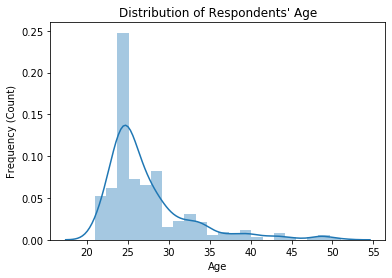

In [21]:
# Plot the histrogram of repondents' ages
plt.figure()
sns.distplot(cleaned_surveys.iloc[:, 75],
             kde = True)
plt.xlabel('Age')
plt.ylabel('Frequency (Count)')
plt.title("Distribution of Respondents' Age")

# Show the plot
plt.show()

From the age descriptive information in previous section, above histogram, and the research of age group in graduate program, we could say that the normal age range is 21-40 years. Hence, ages that are not in this range will be flagged as outliers.

In [22]:
# Initialize outlier column
cleaned_surveys['out_age'] = 0

# Get outliers index
index_hi = cleaned_surveys[cleaned_surveys.iloc[:, 75] > 40].index.values

# Flag as outlier
cleaned_surveys.loc[index_hi, 'out_age'] = 1

# Check the flag
#cleaned_surveys.head(5)

<h3>Duplicated respondents</h3>

In [ ]:
# I will add some code here: PK

<h3><span class="mark">Help me think about the name :P</span></h3>

what we did are flag the windows laptop, change column name, drop unused column

In [24]:
# Initialize current_windows column
cleaned_surveys['current_windows'] = 0

# Get index where current laptop is windows
index_windows = cleaned_surveys[cleaned_surveys.iloc[:, 72] == 'Windows laptop'].index.values

# Flag 
cleaned_surveys.loc[index_windows, 'current_windows'] = 1

In [25]:
# Initialize future_windows column
cleaned_surveys['future_windows'] = 0

# Get index where future laptop is windows
index_windows = cleaned_surveys[cleaned_surveys.iloc[:, 73] == 'Windows laptop'].index.values

# Flag 
cleaned_surveys.loc[index_windows, 'future_windows'] = 1

In [26]:
cleaned_surveys.rename(
    columns = {
        'surveyID':'survey_id',
        'Am the life of the party':'party',
        'Feel little concern for others':'concern',
        'Am always prepared':'prepared',
        'Get stressed out easily':'stressful',
        'Have a rich vocabulary':'dictionnary',
        "Talk a lot":'talkative',
        'Am interested in people':'curious',
        'Leave my belongings around':'unorganized',
        'Am relaxed most of the time':'chill',
        'Have difficulty understanding abstract ideas':'unimaginable',
        'Feel comfortable around people':'extrovert',
        'Insult people':'salty',
        'Pay attention to details':'detail_oriented',
        'Worry about things':'worriable',
        'Have a vivid imagination':'imaginary',
        'Keep in the background':'low_key',
        "Sympathize with others' feelings":'sympathic',
        'Make a mess of things':'messy',
        'Seldom feel blue':'not_blue',
        'Am interested in abstract ideas':'abstract',
        'Start conversations':'ice_breaker',
        "Am interested in other people's problems":'caring',
        'Get chores done right away':'action',
        'Am easily disturbed':'agitated',
        'Have excellent ideas':'insightful',
        'Have little to say':'not_talkative',
        'Have a soft heart':'soft_hearted',
        'Often forget to put things back in their proper place':'untidy',
        'Get upset easily':'easily_upset',
        'Have a good imagination':'imagination',
        'Talk to a lot of different people at parties':'social',
        'Am really interested in others':'extrovert',
        'Like order':'like_order',
        'Change my mood a lot':'moody',
        'Am quick to understand things':'quick_learner',
        "Like to draw attention to myself":'attention_seeker',
        'Take time out for others':'caring',
        'Shirk my duties':'irresponsible',
        'Have frequent mood swings':'mood_swing',
        'Use difficult words':'shakeaspeare_person',
        "Mind being the center of attention":'mind_attention',
        "Feel others' emotions":'empathic',
        'Follow a schedule':'scheduled',
        'Get irritated easily':'easily_irritated',
        'Spend time reflecting on things':'reflective',
        'Am quiet around strangers':'shy',
        'Make people feel at ease':'congenial',
        'Am exacting in my work':'strict',
        'Often feel blue':'blue',
        'Am full of ideas':'creative',
        'See underlying patterns in complex situations':'sherlock_person',
        "Generate ideas that are new and different":'create_different',
        'Demonstrate an awareness of personal strengths and limitations':'self_awareness',
        'Display a growth mindset':'growth_mindset',
        'Respond effectively to multiple priorities':'multitask',
        "Take initiative even when circumstances, objectives, or rules aren't clear":'initiative',
        'Encourage direct and open discussions':'open_discussion',
        'Respond effectively to multiple priorities.1':'multitask1',
        "Take initiative even when circumstances, objectives, or rules aren't clear.1":'initiative1',
        'Encourage direct and open discussions.1':'open_discussion1',
        'Listen carefully to others':'listener',
        "Persuasively sell a vision or idea":'persuasive',
        'Build cooperative relationships':'people_person',
        'Work well with people from diverse cultural backgrounds':'adaptive',
        'Effectively negotiate interests, resources, and roles':'negotiator',
        "Can rally people on the team around a common goal":'leader',
        'Translate ideas into plans that are organized and realistic':'ideas_to_plans',
        'Resolve conflicts constructively':'conflict_solver',
        'Seek and use feedback from teammates':'feedback_person',
        'Coach teammates for performance and growth':'coach',
        'Drive for results':'result_oriented',
        'What laptop do you currently have?':'current_laptop',
        'What laptop would you buy in next assuming if all laptops cost the same?':'future_laptop',
        'What program are you in?':'program',
        'What is your age?':'age',
        'Gender':'gender',
        'What is your nationality? ':'nationality',
        'What is your ethnicity?':'ethnicity'
    },
    inplace = True)

In [28]:
featured_surveys = cleaned_surveys.drop(['multitask', 
                                         'initiative',
                                         'open_discussion',
                                         'multitask1',
                                         'initiative1',
                                         'open_discussion1'], 
                                        axis = 1)

# Check the changes
featured_surveys.head(5)

,survey_id,party,concern,prepared,stressful,dictionnary,talkative,curious,unorganized,chill,unimaginable,extrovert,salty,detail_oriented,worriable,imaginary,low_key,sympathic,messy,not_blue,abstract,ice_breaker,caring,action,agitated,insightful,not_talkative,soft_hearted,untidy,easily_upset,imagination,social,extrovert,like_order,moody,quick_learner,attention_seeker,caring,irresponsible,mood_swing,shakeaspeare_person,mind_attention,empathic,scheduled,easily_irritated,reflective,shy,congenial,strict,blue,creative,sherlock_person,create_different,self_awareness,growth_mindset,listener,persuasive,people_person,adaptive,negotiator,leader,ideas_to_plans,conflict_solver,feedback_person,coach,result_oriented,current_laptop,future_laptop,program,age,gender,nationality,avg_multitask,avg_initiative,avg_open_discussion,out_age,current_windows,future_windows
0,a1000,4,3,4,3,4,4,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,4,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,4.0,4.0,4.0,0,0,0
1,a1001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,4,3,1,3,4,4,3,4,2,1,5,2,4,5,4,4,2,4,3,2,2,4,3,5,4,5,4,5,5,3,4,4,4,2,4,5,4,4,4,2,3,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,4.5,4.5,5.0,0,1,1
2,a1002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,2,3,2,4,3,3,2,3,2,2,4,4,3,1,2,5,2,3,2,1,2,1,3,4,4,2,3,3,3,1,4,3,4,5,3,3,4,3,4,4,4,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,5.0,2.0,3.0,0,1,1
3,a1003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,4,3,1,5,4,5,2,2,5,3,3,3,4,3,3,4,3,4,3,4,5,3,5,5,3,5,3,3,5,3,3,3,5,5,3,5,5,5,1,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,4.5,4.5,4.0,0,1,1
5,a1005,3,2,2,5,2,4,4,2,3,2,2,2,4,5,3,4,4,4,2,3,2,4,2,4,3,4,4,3,3,4,2,4,3,4,4,2,4,3,3,3,3,4,2,4,4,4,3,3,4,3,4,4,3,4,4,2,3,4,3,4,3,3,5,3,4,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,Indian,4.0,3.0,3.0,0,0,0


In [29]:
featured_surveys.to_excel("Survey_Data_Final_Exam_features.xlsx",
                          index = False)

<h2>Step III: Agglomerative Clustering</h2>

In [30]:
# Scale (normalizing) variables before correlation analysis

# Drop demographic information
personality_traits = featured_surveys.drop(['survey_id',
                                            'current_laptop',
                                            'future_laptop',
                                            'program',
                                            'age',
                                            'gender',
                                            'nationality',
                                            'out_age',
                                            'current_windows', 
                                            'future_windows'],
                                           axis = 1)

# Instantiate a StandardScaler() object
scaler = StandardScaler()

# Fit and transform the scaler with the data
X_scaled = scaler.fit_transform(personality_traits)

# Convert scaled data into a DataFrame
traits_scaled = pd.DataFrame(X_scaled)

# Reattach column names
traits_scaled.columns = personality_traits.columns

# Check pre- and post-scaling variance
# print(pd.np.var(personality_traits), '\n\n')
# print(pd.np.var(traits_scaled))

In [31]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[au_corr >= 0.5]

print("Top Absolute Correlations")
get_top_abs_correlations(traits_scaled)

Top Absolute Correlations


moody            mood_swing             0.780563
sympathic        empathic               0.604622
mood_swing       easily_irritated       0.592366
easily_upset     easily_irritated       0.588132
conflict_solver  coach                  0.567774
easily_upset     mood_swing             0.562058
moody            easily_irritated       0.551374
avg_initiative   avg_open_discussion    0.551193
avg_multitask    avg_initiative         0.543706
easily_upset     moody                  0.539871
people_person    adaptive               0.533362
insightful       creative               0.528603
messy            untidy                 0.519762
adaptive         negotiator             0.519268
avg_multitask    avg_open_discussion    0.518336
negotiator       coach                  0.513245
ice_breaker      shy                    0.507486
mood_swing       blue                   0.503466
ice_breaker      social                 0.501168
dtype: float64

<span class="mark">Notice that only a few (Pearson) correlations have an absolute value above 0.50. This makes the dataset a good candidate for PCA. As such, we may be able to explain a high degree of variance with a small number of principal components.</span>

In [32]:
# Instantiate a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 222)

# Fit and transform the scaled data
traits_pca = pca.fit_transform(traits_scaled)

# comparing dimensions of each DataFrame
print("Original shape:", traits_scaled.shape)
print("PCA shape     :", traits_pca.shape)

Original shape: (382, 68)
PCA shape     : (382, 68)


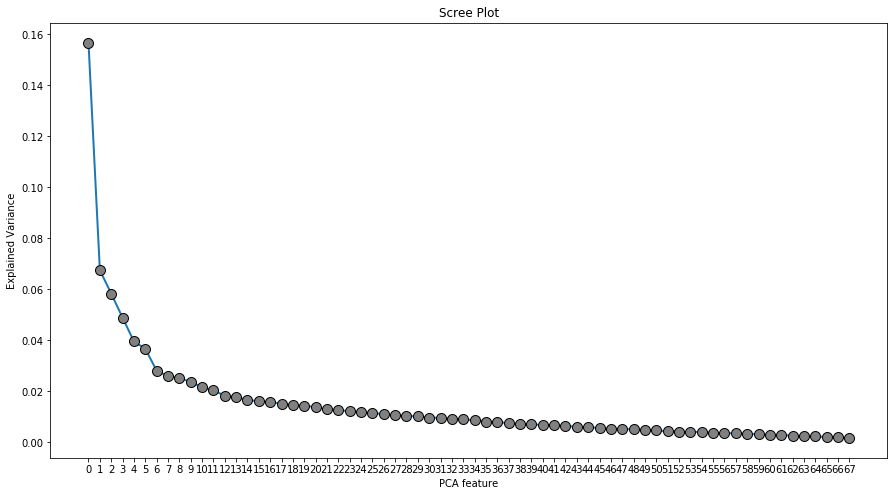

In [33]:
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(15, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

# calling the scree_plot function
scree_plot(pca)

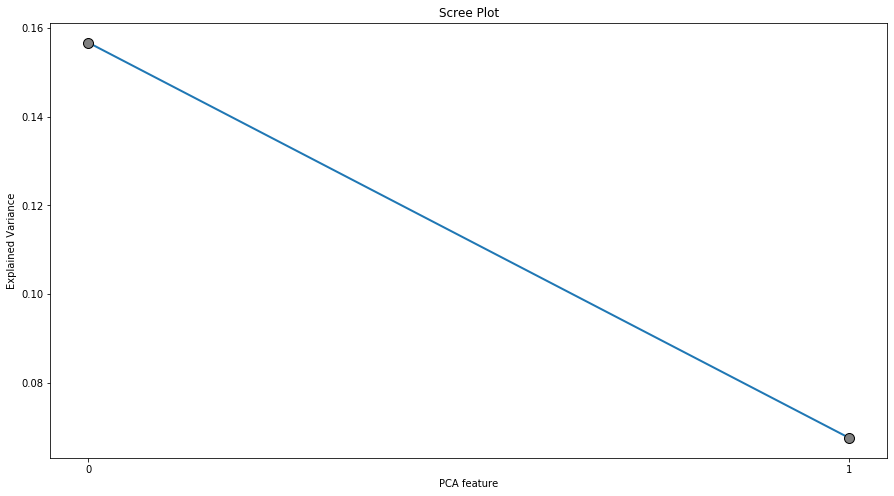

In [34]:
# Instantiate a new model using the first two principal components
pca_2 = PCA(n_components = 2,
            random_state = 802)

# Fit and transform the scaled data
traits_pca_2 = pca_2.fit_transform(traits_scaled)

X_pca_df = pd.DataFrame(traits_pca_2)

# calling the scree_plot function
scree_plot(pca_object = pca_2)

In [35]:
# Transpose pca components (pc = 3)
factor_loadings_2 = pd.DataFrame(pd.np.transpose(pca_2.components_))

# Name rows as original features
factor_loadings_2 = factor_loadings_2.set_index(traits_scaled.columns)

factor_loadings_2.columns = ['Type_I', 'Type_II']

print(f"""
2 Components Factor Loadings
------------------------------
{factor_loadings_2.round(2)}
""")


2 Components Factor Loadings
------------------------------
                     Type_I  Type_II
party                 -0.06     0.05
concern                0.08     0.03
prepared              -0.10    -0.06
stressful              0.05     0.28
dictionnary           -0.09    -0.04
talkative             -0.10    -0.07
curious               -0.12     0.04
unorganized            0.05     0.06
chill                 -0.04    -0.12
unimaginable           0.09     0.13
extrovert             -0.14    -0.11
salty                  0.10     0.05
detail_oriented       -0.12     0.04
worriable             -0.01     0.26
imaginary             -0.08     0.16
low_key                0.08     0.16
sympathic             -0.14     0.14
messy                  0.08     0.19
not_blue              -0.01    -0.05
abstract              -0.13    -0.02
ice_breaker           -0.15    -0.02
caring                -0.10     0.06
action                -0.09    -0.00
agitated               0.12     0.20
insightful    

In [36]:
# Instantiate a StandardScaler() object
scaler = StandardScaler()

# Fit and transform the scaler with the data
X_scaled = scaler.fit_transform(X_pca_df)

# Convert scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled)

# Reattach column names
pca_scaled.columns = factor_loadings_2.columns

# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

0    10.657713
1     4.590356
dtype: float64 


Type_I     1.0
Type_II    1.0
dtype: float64


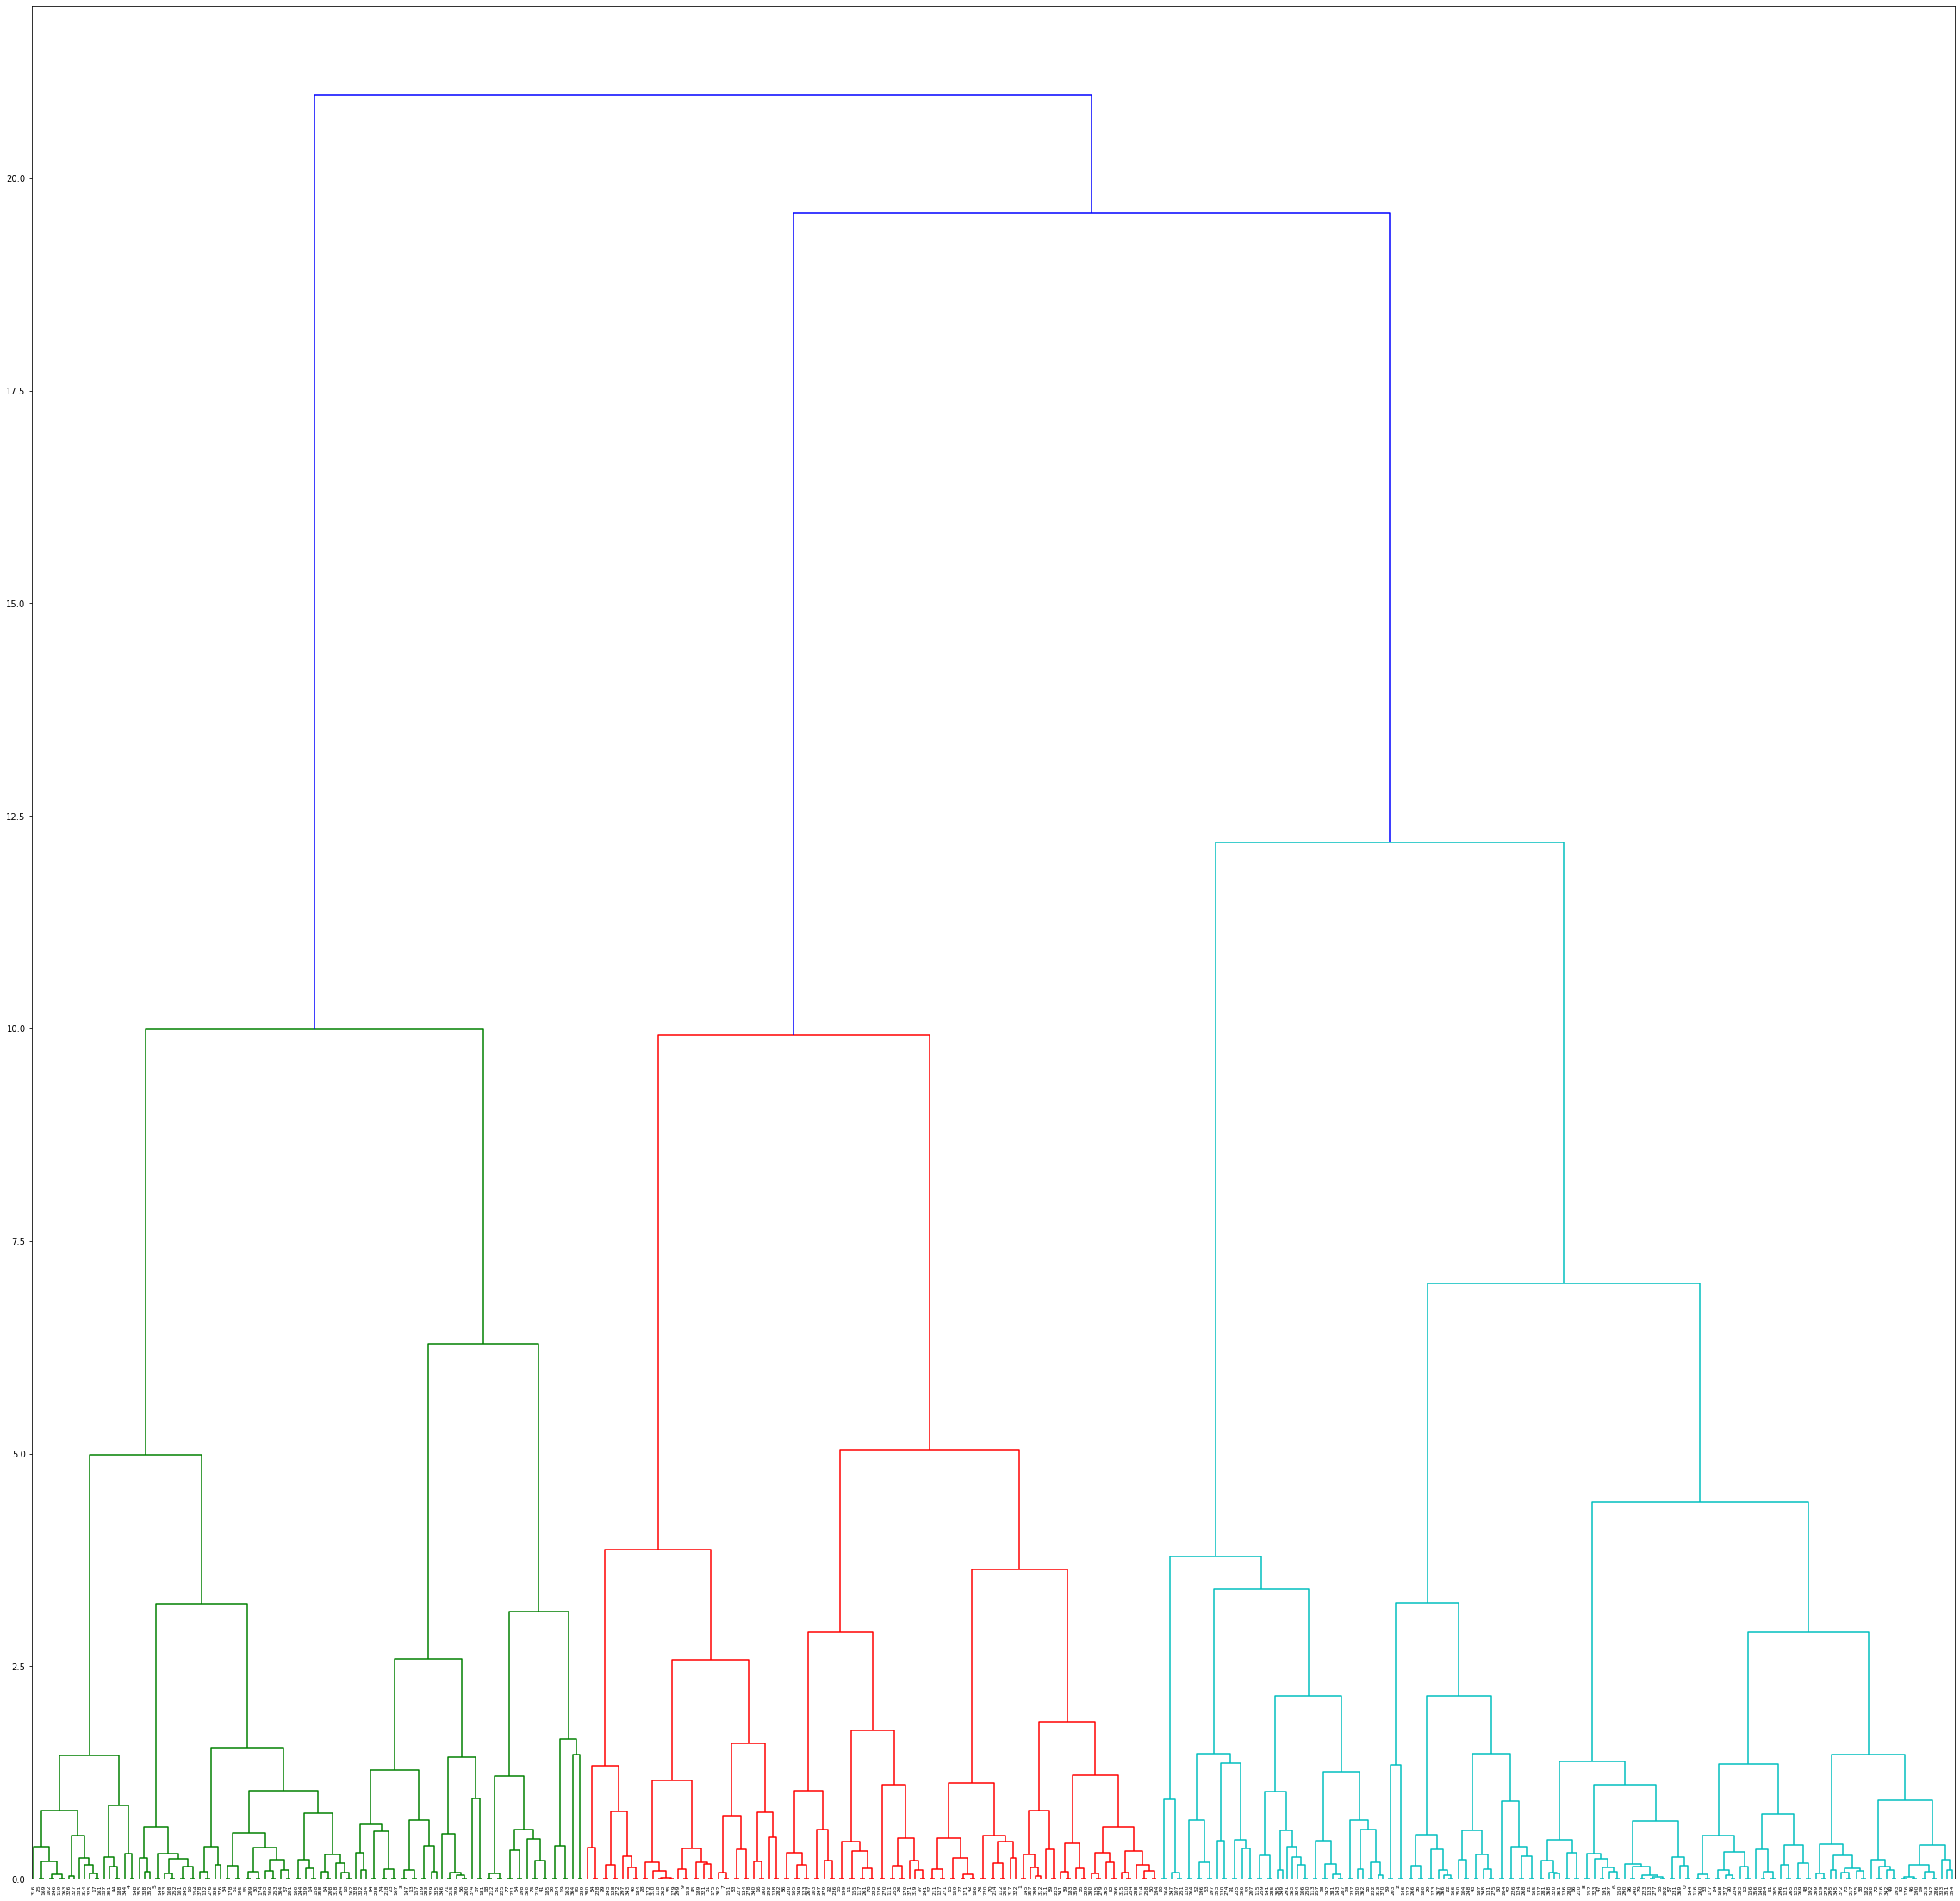

In [39]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward')

# setting plot size
fig, ax = plt.subplots(figsize=(40, 40))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)

# saving and displaying the plot
plt.show()

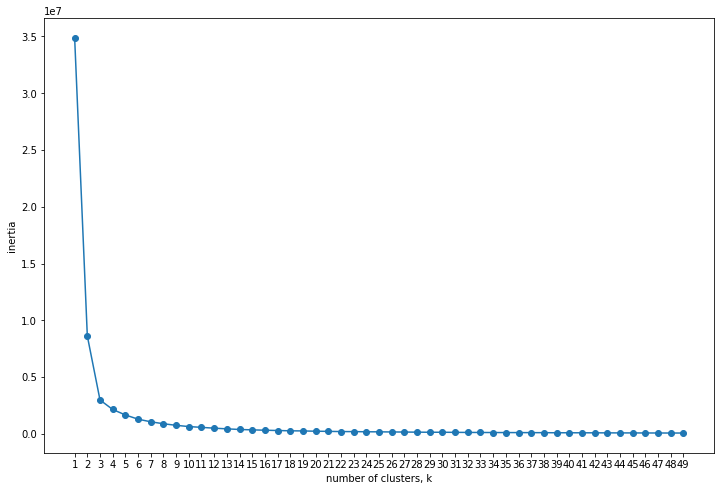

In [40]:
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

interia_plot(standard_mergings_ward)

In [44]:
# Instantiate a k-Means object
traits_k_pca = KMeans(n_clusters = 3,
                      random_state = 802)

# Fit the object to the data
traits_k_pca.fit(pca_scaled)

# Convert the clusters to a DataFrame
traits_kmeans_pca = pd.DataFrame({'Cluster': traits_k_pca.labels_})

# Check the results
print(traits_kmeans_pca.iloc[: , 0].value_counts())

2    144
0    138
1    100
Name: Cluster, dtype: int64


In [45]:
# Store cluster centers
centroids_pca = traits_k_pca.cluster_centers_

# Convert cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)

# Rename principal components
centroids_pca_df.columns = factor_loadings_2.columns

# Check results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Type_I,Type_II
0,0.82,-0.51
1,0.18,1.29
2,-0.92,-0.41


In [58]:
# Concatinate cluster memberships with principal components
clst_pca_df = pd.concat([traits_kmeans_pca,  X_pca_df.round(2)],
                        axis = 1)

# Get demographic columns
demo_df = featured_surveys.loc[ : , ['current_laptop', 'future_laptop', 'gender']]

# Reset row index before concat, otherwise it will concat with old index,
# causing null
clst_pca_df.reset_index(drop=True, inplace=True)
demo_df.reset_index(drop=True, inplace=True)

# Concatenate demographic information with pca-clusters
final_pca_clust_df = pd.concat(
    [demo_df, clst_pca_df],
    axis = 1, 
    ignore_index=True)

# Rename columns
final_pca_clust_df.columns = ['current_laptop', 
                              'future_laptop',
                              'gender', 
                              'Cluster', 
                              'Type_I', 
                              'Type_II']

# checking the results
print(final_pca_clust_df.head(n = 10))

   current_laptop   future_laptop  gender  Cluster  Type_I  Type_II
0         Macbook         Macbook  Female        0    0.27    -0.26
1  Windows laptop  Windows laptop    Male        1   -0.16     1.36
2  Windows laptop  Windows laptop    Male        0    3.12    -4.82
3  Windows laptop  Windows laptop  Female        1   -1.52     3.91
4         Macbook         Macbook    Male        1    4.65     2.77
5  Windows laptop         Macbook  Female        1    0.88     2.54
6         Macbook         Macbook    Male        0    1.21    -0.94
7  Windows laptop  Windows laptop  Female        2   -2.04    -2.90
8         Macbook         Macbook    Male        0    1.67    -0.86
9  Windows laptop      Chromebook    Male        2   -3.75    -1.64


In [60]:
# Renaming cluster
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3'}

final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)

final_pca_clust_df.head(5)

,current_laptop,future_laptop,gender,Cluster,Type_I,Type_II
0,Macbook,Macbook,Female,Cluster 1,0.27,-0.26
1,Windows laptop,Windows laptop,Male,Cluster 2,-0.16,1.36
2,Windows laptop,Windows laptop,Male,Cluster 1,3.12,-4.82
3,Windows laptop,Windows laptop,Female,Cluster 2,-1.52,3.91
4,Macbook,Macbook,Male,Cluster 2,4.65,2.77


<h2>Step IV: Analyze with Demographics</h2>

<span class="mark">Now that we've completed all of our preparation through machine learning, we can analyze our results with demographics and other data.

Pause before this step so that you can consider all of the hypotheses and assumptions you have made up to this point. Also consider all of the assumptions your organization is making. For example, if the company is convinced of a particular trend, the following is a good opportunity to validate/negate that information.</span>

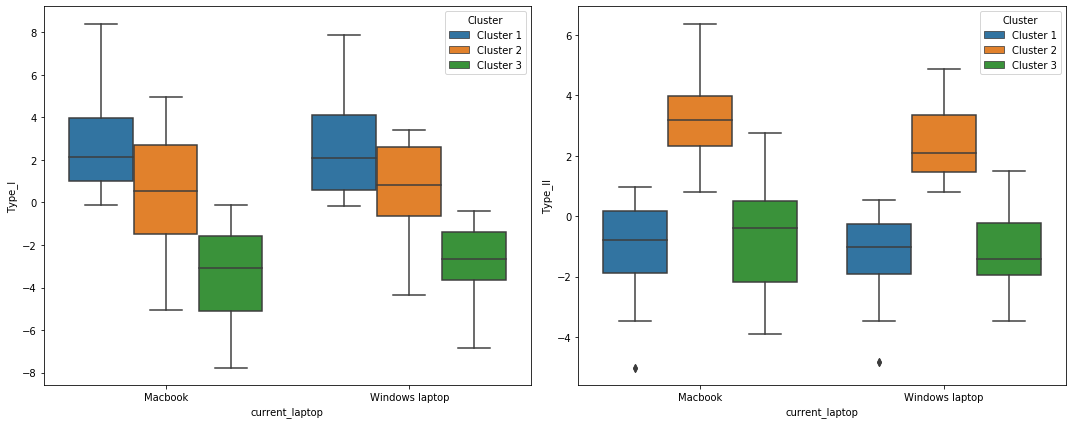

In [68]:
# Herbivores
fig, ax = plt.subplots(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'current_laptop',
            y = 'Type_I',
            hue = 'Cluster',
            data = final_pca_clust_df)

plt.subplot(1, 2, 2)
sns.boxplot(x = 'current_laptop',
            y = 'Type_II',
            hue = 'Cluster',
            data = final_pca_clust_df)

plt.tight_layout()
plt.show()

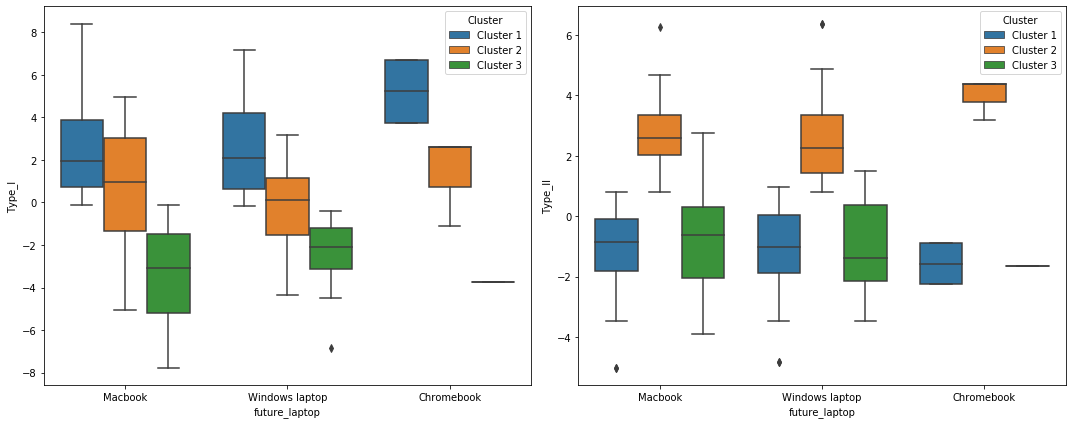

In [69]:
# Herbivores
fig, ax = plt.subplots(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'future_laptop',
            y = 'Type_I',
            hue = 'Cluster',
            data = final_pca_clust_df)

plt.subplot(1, 2, 2)
sns.boxplot(x = 'future_laptop',
            y = 'Type_II',
            hue = 'Cluster',
            data = final_pca_clust_df)

plt.tight_layout()
plt.show()

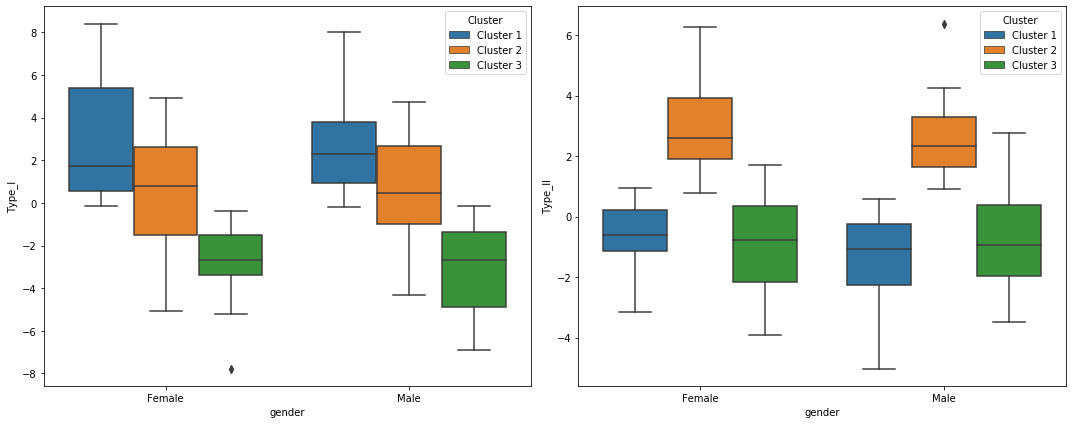

In [70]:
# Herbivores
fig, ax = plt.subplots(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'gender',
            y = 'Type_I',
            hue = 'Cluster',
            data = final_pca_clust_df)

plt.subplot(1, 2, 2)
sns.boxplot(x = 'gender',
            y = 'Type_II',
            hue = 'Cluster',
            data = final_pca_clust_df)

plt.tight_layout()
plt.show()